In [1]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv('Loan_data.csv')
print(data.head())
#basic EDA
print(data.shape)
print(data.columns)
print(data.dtypes)


   Gender        Job  WorkExp  CreditScore  EMIRatio Status CreditHistory  \
0    Male  unskilled       14           86       3.0     No          poor   
1  Female    skilled       15           94       3.0     No          poor   
2    Male  unskilled       16           86       3.0     No          poor   
3  Female    skilled       13           94       3.0     No          poor   
4    Male    skilled       12           85       3.3     No          poor   

   Ownhouse   Purpose  Dependents  
0         1  personal           2  
1         1  personal           3  
2         1  personal           2  
3         1  personal           3  
4         1  personal           2  
(781, 10)
Index(['Gender', 'Job', 'WorkExp', 'CreditScore', 'EMIRatio', 'Status',
       'CreditHistory', 'Ownhouse', 'Purpose', 'Dependents'],
      dtype='object')
Gender            object
Job               object
WorkExp            int64
CreditScore        int64
EMIRatio         float64
Status            object
Credi

In [4]:
#categorical variable encoding 
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['Job'] = label_encoder.fit_transform(data['Job'])
data['Status'] = label_encoder.fit_transform(data['Status'])
data['CreditHistory'] = label_encoder.fit_transform(data['CreditHistory'])
data['Purpose'] = label_encoder.fit_transform(data['Purpose'])

print(data.head())

   Gender  Job  WorkExp  CreditScore  EMIRatio  Status  CreditHistory  \
0       1    2       14           86       3.0       1              2   
1       0    1       15           94       3.0       1              2   
2       1    2       16           86       3.0       1              2   
3       0    1       13           94       3.0       1              2   
4       1    1       12           85       3.3       1              2   

   Ownhouse  Purpose  Dependents  
0         1        3           2  
1         1        3           3  
2         1        3           2  
3         1        3           3  
4         1        3           2  


In [31]:
from sklearn.decomposition import PCA 
pca = PCA(2)  
projected = pca.fit_transform(data)
print(projected.shape)


(781, 2)


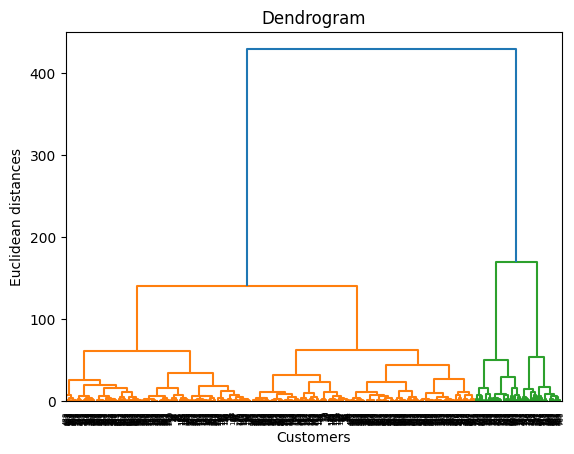

In [32]:
import scipy.cluster.hierarchy as sch
dendro = sch.dendrogram(sch.linkage(projected, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [33]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(projected)

In [20]:
print(y_hc)

[0 1 0 1 0 0 0 0 0 1 1 1 1 1 1 0 0 0 1 0 0 0 0 1 1 0 1 3 1 1 1 1 0 1 0 1 1
 3 0 0 1 1 0 0 0 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 1 1 0 1 0 1 0 1 1 0 0 0 3 1
 1 0 1 1 1 1 1 0 1 1 0 0 0 1 0 1 0 1 1 0 0 1 0 0 0 0 1 1 1 3 1 0 0 1 0 1 1
 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 0 0 0 0 1 1
 1 0 0 0 1 1 1 1 0 0 1 1 1 1 1 0 1 0 1 1 0 0 1 3 0 0 1 1 0 0 3 1 1 0 0 1 0
 0 0 0 1 1 1 1 1 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 1 1 1 1 1 0 0 0 0 3 0 1 0 1
 0 1 1 3 1 1 0 0 1 1 0 1 1 1 1 0 1 1 0 0 3 0 1 0 1 1 1 1 1 0 0 3 0 0 1 1 1
 0 0 0 0 1 1 0 0 1 1 1 0 3 3 0 3 3 1 1 1 1 1 1 1 1 1 0 0 0 0 1 0 1 1 0 0 0
 3 0 0 0 1 1 0 3 0 0 1 0 0 1 1 1 1 0 0 1 0 0 0 1 1 1 3 0 0 0 1 1 1 0 1 0 0
 1 1 0 0 3 0 0 0 0 1 0 0 1 0 0 0 0 1 1 1 1 1 1 0 0 0 1 0 0 0 3 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 1 0 0 1 0 0 0 1 1 1 0 0 1 1 0 0 0 0 0 0 0
 1 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 3 0 0 0 0 0 3 1 1 3 3 0 1 0 0 1 1 0 1
 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 1 1 1 1 0 0 0 0
 0 0 1 0 3 0 0 1 1 0 1 0 

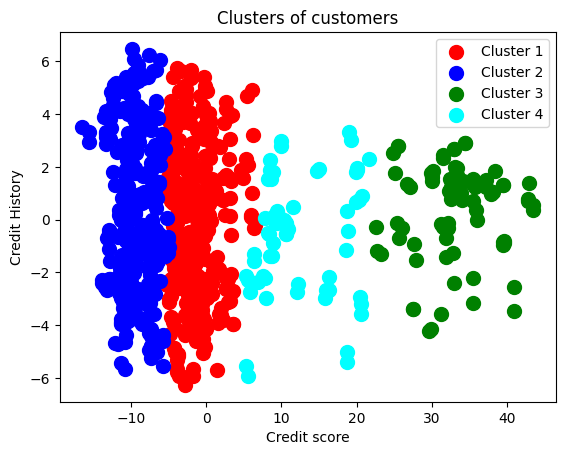

In [34]:
X=projected
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
#plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Credit score')
plt.ylabel('Credit History')
plt.legend()
plt.show()

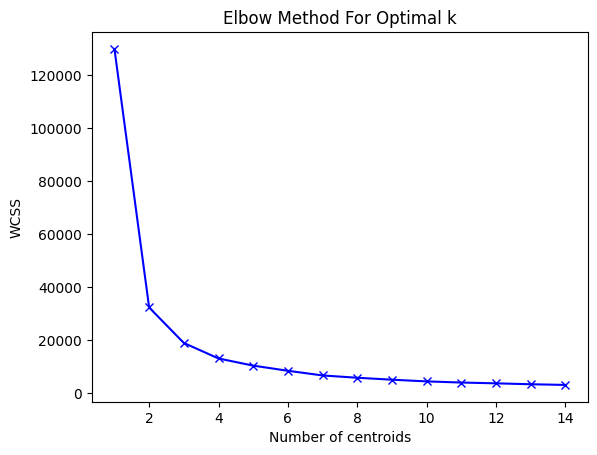

In [35]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
wcss = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(projected)
    wcss.append(km.inertia_)
plt.plot(K, wcss, 'bx-')
plt.xlabel('Number of centroids')
plt.ylabel('WCSS')
plt.title('Elbow Method For Optimal k')
plt.show()

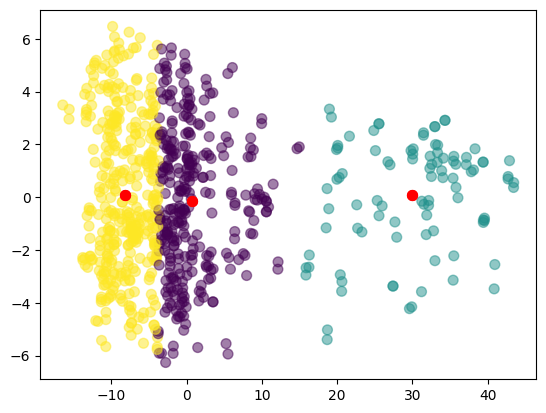

In [36]:
#converting our projected array to pandas df
pca=pd.DataFrame(projected)
pca.columns=['First component','Second Component']#build our algorithm with k=3, train it on pca and make predictions
kmeans = KMeans(n_clusters=3, random_state=0).fit(pca)
y_kmeans = kmeans.predict(pca)#plotting the results 
plt.scatter(pca['First component'], pca['Second Component'], c=y_kmeans, s=50, alpha=0.5,cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=50)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=50)